<a href="https://colab.research.google.com/github/LucasAlbFar/analise_dados_hepatite_brasil/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import numpy as np
import statistics

plt.rc('figure', figsize=(20,7))

## **Carregando dados das doses de vacinas aplicadas entre os anos de 1998 e 2020**

In [108]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/doses_aplicadas_por_ano_1994_2021.csv'

In [109]:
doses_aplicadas = pd.read_csv(url, encoding="ISO-8859-1", sep=";", thousands='.', decimal=',')
doses_aplicadas = doses_aplicadas.drop(['1994', '1995', '1996', '1997'], axis=1) # removendo coluna dos anos abaixo de 1998

doses_aplicadas['Unidade da Federação'] = [(estado[3:]) for estado in doses_aplicadas['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
doses_aplicadas = doses_aplicadas.set_index('Unidade da Federação')                                            # UF's como indíce

total_doses_por_ano = doses_aplicadas.iloc[-1:].T     # salvando o total por ano 
doses_aplicadas = doses_aplicadas.iloc[:-1 , :] # removendo última linha 

total_doses_por_uf =  doses_aplicadas.iloc[: , -1:]   # salvando total por uf
doses_aplicadas = doses_aplicadas.iloc[: , :-2] # removendo coluna total e ano de 2021

doses_aplicadas = doses_aplicadas.astype(int)
doses_aplicadas

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,284513,242985,206296,292553,168095,144339,128169,163340,150128,130536,158254,152052,142750,156774,145596,139752,157942,158399,129642,99495,92868,92366,71858
Acre,67947,1305380,98465,102509,84525,84971,73776,75675,67871,83924,95347,105503,102222,117360,106904,72409,50955,53746,39248,45873,43463,45925,30880
Amazonas,346619,496898,434945,481011,446048,396598,326329,356846,350897,374693,361393,358219,343181,356573,337960,291348,326899,297631,181756,245458,271990,273327,210123
Roraima,130516,94311,106533,67228,68692,69055,58151,80040,71139,69688,77781,67499,70721,68763,62036,58081,70284,70289,42897,86875,90442,77269,55667
Pará,303487,1565678,801902,1090151,1338385,1298510,834766,796893,746010,753835,717106,655370,661978,707089,714286,705853,568474,444935,267492,432441,389415,407324,331734
Amapá,71395,138089,109414,154072,109364,91928,66098,65280,61688,60916,77572,70762,86950,77110,72390,53680,54348,60370,47575,50889,43991,45813,27905
Tocantins,342615,367434,298045,267479,222614,203614,142491,150169,128696,122637,125628,106307,118082,126214,110612,129179,139990,103585,59184,90441,80323,83442,68392
Maranhão,217434,1752105,1303390,999999,831603,744063,656124,663516,642167,619627,630308,601414,693618,797951,751562,692688,647301,624073,339966,505626,433489,405860,306017
Piauí,4427,187320,273151,360373,282231,656926,405909,322608,277908,287079,233866,238804,242285,313273,272943,270824,250057,180644,106730,160172,145106,155048,128168


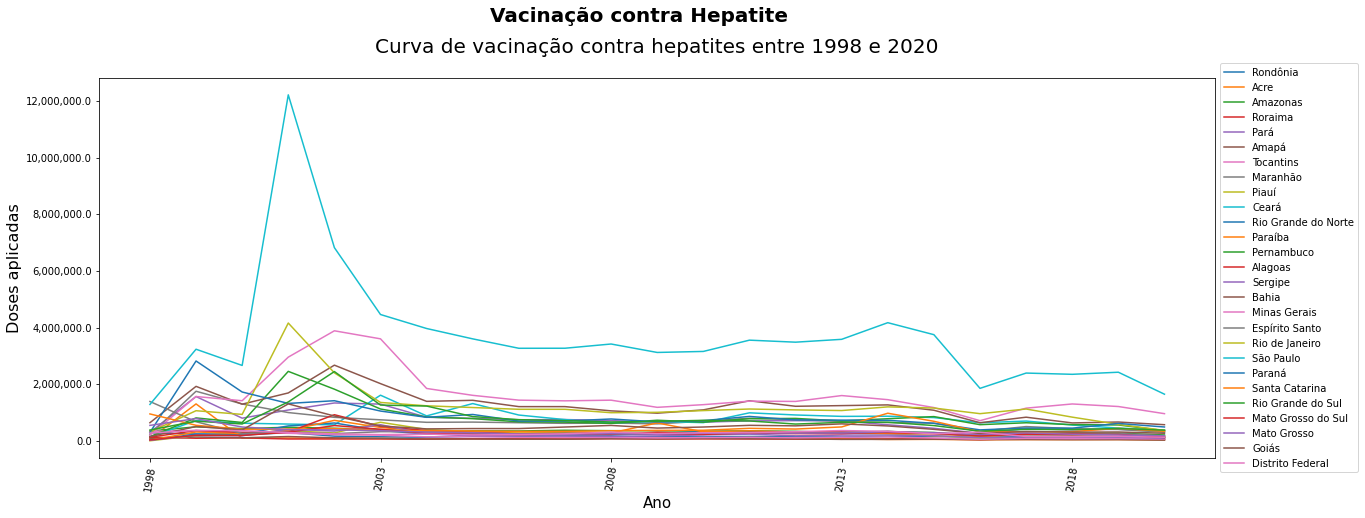

In [110]:
ax = doses_aplicadas.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Vacinação contra Hepatite", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Curva de vacinação contra hepatites entre 1998 e 2020',{'fontsize': 20}).set_position([.5, 1.05])

plt.ylabel("Doses aplicadas", size = 16)
plt.xlabel("Ano", size = 15)
plt.xticks(rotation=80)
plt.show()

In [111]:
total_doses_por_ano = total_doses_por_ano.iloc[:-1 , :] # remoção da última linha 'Total'
total_doses_por_ano = total_doses_por_ano.reset_index()
total_doses_por_ano.columns = ['Ano', 'Total']
total_doses_por_ano.set_index('Ano', inplace=True)
total_doses_por_ano

,Total
Ano,
1998,8747762
1999,23190333
2000,16638796
2001,35247081
2002,30965529
2003,24335596
2004,18034244
2005,17202354
2006,15237627


In [112]:
total_doses_por_uf

,Total
Unidade da Federação,
Rondônia,4249402
Acre,3301230
Amazonas,8809287
Roraima,1892744
Pará,17467925
Amapá,1787161
Tocantins,3762221
Maranhão,16008612
Piauí,5795318


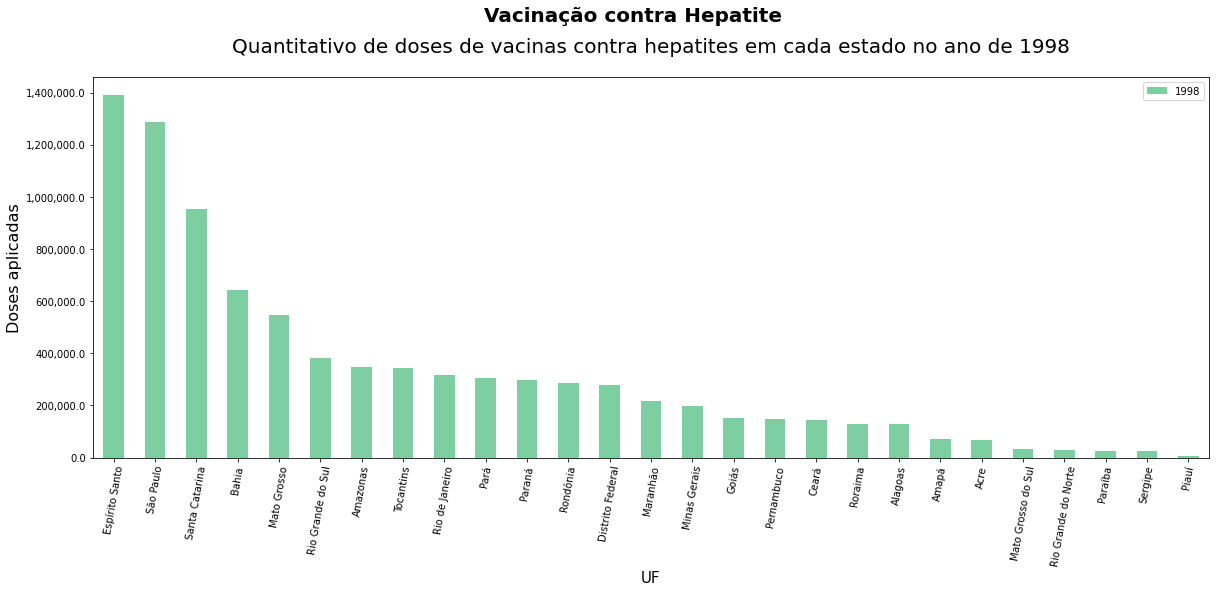

In [113]:
ax = doses_aplicadas.sort_values(by='1998', ascending=False).plot(y='1998', kind='bar',color="#7DCEA0")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Vacinação contra Hepatite", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Quantitativo de doses de vacinas contra hepatites em cada estado no ano de 1998', {'fontsize': 20}).set_position([.5, 1.05])

plt.ylabel("Doses aplicadas", size = 16)
plt.xlabel("UF", size = 15)
plt.xticks(rotation=80)
plt.show()

## **Carregando dados dos óbitos por hepatites, entre os anos de 1998 e 2020**

In [114]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/morbilidade_hospitalar_sus_1995_2007.csv'

In [115]:
obitos_hepatite_1998_2007 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=1, thousands='.', decimal=',')

obitos_hepatite_1998_2007['Unidade da Federação'] = [(estado[3:]) for estado in obitos_hepatite_1998_2007['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.set_index('Unidade da Federação')                                            # UF's como indíce

total_obitos_por_ano_1998_2007 = obitos_hepatite_1998_2007.iloc[-1:].T     # salvando o total por ano 
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.iloc[:-1 , :] # removendo última linha 
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.iloc[:-1 , :] # removendo última linha 

total_obitos_por_uf_1998_2007 =  obitos_hepatite_1998_2007.iloc[: , -1:]   # salvando total por uf
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.iloc[: , :-1] # removendo coluna total

obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.replace('-', 0)
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [116]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/morbilidade_hospitalar_sus_2008_2021.csv'

In [117]:
obitos_hepatite_2008_2020 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=6, thousands='.', decimal=',')

obitos_hepatite_2008_2020['Unidade da Federação'] = [(estado[3:]) for estado in obitos_hepatite_2008_2020['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.set_index('Unidade da Federação')                                            # UF's como indíce

total_obitos_por_ano_2008_2020 = obitos_hepatite_2008_2020.iloc[-1:].T     # salvando o total por ano 
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.iloc[:-1 , :] # removendo última linha 

total_obitos_por_uf_2008_2020 =  obitos_hepatite_2008_2020.iloc[: , -1:]   # salvando total por uf
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.iloc[: , :-2] # removendo coluna total e do ano 2021

obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.replace('-', 0)
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [118]:
obitos_hepatite = pd.merge(obitos_hepatite_1998_2007, obitos_hepatite_2008_2020, on='Unidade da Federação')
obitos_hepatite

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,9,10,6,13,9,12,5,8,10,8,8,11,8,4,16,14,11,10,11,15,14,17,3
Acre,5,16,15,11,26,22,39,18,27,19,18,22,25,23,20,17,25,17,25,17,24,23,12
Amazonas,13,21,13,15,16,15,21,19,11,8,14,11,20,14,16,16,22,10,24,18,12,18,29
Roraima,2,2,1,2,1,2,1,4,1,1,1,4,4,0,1,0,1,2,1,1,1,2,2
Pará,23,33,26,28,19,30,34,34,22,30,19,19,15,11,19,17,21,17,12,9,15,18,17
Amapá,1,4,0,6,2,0,1,5,0,1,3,4,2,3,3,4,1,2,3,2,1,0,0
Tocantins,0,5,1,2,1,1,4,7,4,6,6,1,6,3,1,3,2,1,1,1,1,0,1
Maranhão,25,24,12,13,22,20,24,26,27,17,10,8,13,23,16,17,15,27,8,10,12,3,3
Piauí,3,7,12,5,8,5,15,12,14,5,7,8,5,7,12,3,9,3,4,7,5,4,3


In [120]:
total_obitos_por_ano_1998_2007 = total_obitos_por_ano_1998_2007.iloc[:-1 , :] # remoção da última linha 'Total'
total_obitos_por_ano_1998_2007 = total_obitos_por_ano_1998_2007.reset_index()
total_obitos_por_ano_1998_2007.columns = ['Ano', 'Total']
total_obitos_por_ano_1998_2007.set_index('Ano', inplace=True)
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 'Total'
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 2021
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.reset_index()
total_obitos_por_ano_2008_2020.columns = ['Ano', 'Total']
total_obitos_por_ano_2008_2020.set_index('Ano', inplace=True)
total_obitos_por_ano = pd.concat([total_obitos_por_ano_1998_2007, total_obitos_por_ano_2008_2020])
total_obitos_por_ano = total_obitos_por_ano.astype(int)
total_obitos_por_ano

,Total
Ano,
1998,435
1999,435
2000,445
2001,468
2002,646
2003,727
2004,713
2005,678
2006,597


In [121]:
total_obitos_por_uf = total_obitos_por_uf_1998_2007 + total_obitos_por_uf_2008_2020
total_obitos_por_uf

,Total
Unidade da Federação,
Rondônia,234
Acre,468
Amazonas,382
Roraima,38
Pará,490
Amapá,48
Tocantins,58
Maranhão,375
Piauí,164


## **Carregando os dados referentes aos valores totais gastos em hospitais públicos em casos de mobilidade associadas à hepatite aguda tipo B e outras hepatites virais**

In [211]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/valor_total_morbilidade_hospitalar_sus_1995_2007.csv'

In [212]:
valor_obitos_hepatite_1998_2007 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=1, thousands='.', decimal=',')

valor_obitos_hepatite_1998_2007['Unidade da Federação'] = [(estado[3:]) for estado in valor_obitos_hepatite_1998_2007['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.set_index('Unidade da Federação')   

total_valor_obitos_por_ano_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[-1:].T   # salvando o total por ano 
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[:-1 , :]      # removendo última linha 
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[:-1 , :]      # removendo última linha 

total_valor_obitos_por_uf_1998_2007 =  valor_obitos_hepatite_1998_2007.iloc[: , -1:]   # salvando total por uf
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[: , :-1] # removendo coluna total
# valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [213]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/valor_total_morbilidade_hospitalar_sus_2008_2021.csv'

In [214]:
valor_obitos_hepatite_2008_2020 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=6, thousands='.', decimal=',')

valor_obitos_hepatite_2008_2020['Unidade da Federação'] = [(estado[3:]) for estado in valor_obitos_hepatite_2008_2020['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.set_index('Unidade da Federação')   

total_valor_obitos_por_ano_2008_2020 = valor_obitos_hepatite_2008_2020.iloc[-1:].T   # salvando o total por ano 
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.iloc[:-1 , :]      # removendo última linha 
# valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.iloc[:-1 , :]      # removendo última linha

total_valor_obitos_por_uf_2008_2020 =  valor_obitos_hepatite_2008_2020.iloc[: , -1:]   # salvando total por uf
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.iloc[: , :-2] # removendo coluna total e do ano 2021
# valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.astype(float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [215]:
valor_obitos_hepatite = pd.merge(valor_obitos_hepatite_1998_2007, valor_obitos_hepatite_2008_2020, on='Unidade da Federação')
valor_obitos_hepatite

,1998/Jan,1998/Fev,1998/Mar,1998/Abr,1998/Mai,1998/Jun,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Nov,1998/Dez,1999/Jan,1999/Fev,1999/Mar,1999/Abr,1999/Mai,1999/Jun,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,2000/Mai,2000/Jun,2000/Jul,2000/Ago,2000/Set,2000/Out,2000/Nov,2000/Dez,2001/Jan,2001/Fev,2001/Mar,2001/Abr,...,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,2518.22,5406.73,4699.43,2170.66,5301.20,2712.72,6366.34,4231.80,5624.22,3202.75,6544.78,3754.94,2182.95,4712.08,3509.79,4661.19,6749.75,4303.31,3910.32,4433.78,5868.69,3677.66,4953.13,3703.39,7353.18,5693.66,7432.10,7094.03,7168.86,3282.68,7547.47,6743.98,6207.06,7355.96,8856.38,9964.85,10303.27,9980.35,9613.53,10032.38,...,7980.51,2153.59,76473.80,5961.43,21223.17,6900.26,7429.53,3770.00,5472.79,3241.09,4281.26,6313.65,2069.62,4982.00,12724.83,3276.36,7809.67,4608.16,5245.23,4362.13,6690.93,25427.91,20323.12,5281.65,12014.81,2904.59,11213.79,5638.73,3039.92,2977.26,2399.46,3072.62,1543.59,963.39,756.96,653.63,446.22,1735.22,3814.39,1319.76
Acre,426.50,2138.75,2696.93,2463.00,3298.52,2239.23,2080.88,4371.83,3638.70,4196.50,5971.82,1386.19,4233.96,3750.85,2450.81,4638.51,4667.67,2591.91,2816.78,2664.06,4637.06,7011.64,6300.56,5427.82,6606.81,6827.84,3508.07,2824.70,7437.41,3353.69,6006.17,3127.95,3021.60,4609.67,4621.48,4294.42,5520.20,3628.60,8556.06,6662.24,...,10102.28,1694.99,6728.54,11172.19,16410.84,4187.07,2003.87,6189.49,75703.32,6715.71,15828.57,32993.66,7673.73,5386.18,7004.18,7244.37,12113.22,13594.24,3848.65,4659.37,5817.61,8782.43,6147.12,14990.02,5634.24,17219.51,15285.40,5344.90,2362.85,1987.15,6212.46,2288.03,2135.23,13383.72,3551.78,1353.79,8999.54,8990.53,769.77,1407.07
Amazonas,2934.12,4873.82,3818.28,4758.15,5844.10,5885.59,6796.07,4827.48,3842.29,3459.94,3273.56,4415.14,6681.71,4987.99,5892.30,5785.01,4734.30,4641.65,3268.10,6010.29,4261.31,4724.81,5886.13,8624.48,6712.46,5066.16,9681.68,6654.09,9944.33,5137.99,4837.53,8246.97,5216.07,3938.99,7192.99,8128.77,4376.06,4581.31,4965.15,7208.43,...,5393.00,9083.77,1870.74,15049.19,5658.72,5252.85,97799.27,3457.92,2980.02,2437.18,5365.04,4033.52,4397.51,6186.12,102317.08,5298.88,4302.87,15705.03,12457.83,6385.83,6552.66,13282.55,7026.06,6372.83,7561.50,5436.03,1900.65,6662.58,8988.03,12301.56,8755.96,5573.32,5800.35,11936.91,2393.37,7392.01,3665.14,3978.73,8347.16,16099.21
Roraima,95.93,106.75,85.30,85.30,660.10,426.52,319.89,106.63,319.89,945.73,426.52,213.26,692.27,639.78,532.82,746.41,213.26,666.37,426.52,453.34,418.36,198.97,464.37,-,-,-,-,-,-,-,893.73,1319.95,239.35,547.85,493.42,40.38,348.88,634.28,158.59,516.15,...,-,44.22,1002.98,-,-,-,267.11,665.09,-,-,-,777.27,-,-,318.07,1255.74,116898.39,-,1427.86,562.54,267.11,541.24,9194.13,328.19,-,-,857.58,-,328.19,893.46,1577.05,1659.23,282.13,-,826.55,-,-,-,-,306.59
Pará,7554.67,8424.74,14703.97,12560.54,13724.84,21870.50,16818.53,17934.18,16076.59,18707.26,17212.66,20220.03,18695.14,19337.41,16178.25,16142.57,19428.87,18189.06,17197.39,16347.45,16410.37,24039.98,26823.07,28147.69,26484.83,33532.45,29618.55,31051.99,25612.82,27862.82,26572.83,24925.80,28029.02,37313.19,31864.21,30001.21,30780.56,31117.57,26713.40,31563.64,...,10853.93,10100.97,33942.59,8550.44,8546.58,8253.58,4519.08,8410.84,15465.42,7941.23,9368.23,9215.84,8184.91,9109.39,102409.72,6341.28,9528.25,9051.39,108190.26,7329.06,5348.49,10381.72,6087.73,8420.01,7817.48,13509.57,7835.61,5785.47,8665.94,12388.55,9012.35,3466.00,7458.36,2494.68,1993.27,4378.79,6419.86,2742.10,4778.08,7358.18
Amapá,85.30,170.60,-,163.00,369.89,897.88,8

In [216]:
total_valor_obitos_por_ano_1998_2007 = total_valor_obitos_por_ano_1998_2007.iloc[:-1 , :] # remoção da última linha 'Total'
total_valor_obitos_por_ano_1998_2007 = total_valor_obitos_por_ano_1998_2007.reset_index()
total_valor_obitos_por_ano_1998_2007.columns = ['Ano', 'Total']
total_valor_obitos_por_ano_1998_2007.set_index('Ano', inplace=True)

total_valor_obitos_por_ano_2008_2020 = total_valor_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 'Total'
total_valor_obitos_por_ano_2008_2020 = total_valor_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 2021
total_valor_obitos_por_ano_2008_2020 = total_valor_obitos_por_ano_2008_2020.reset_index()
total_valor_obitos_por_ano_2008_2020.columns = ['Ano', 'Total']
total_valor_obitos_por_ano_2008_2020.set_index('Ano', inplace=True)

total_valor_obitos_por_ano = pd.concat([total_valor_obitos_por_ano_1998_2007, total_valor_obitos_por_ano_2008_2020])
total_valor_obitos_por_ano

,Total
Ano,
1998/Jan,148942
1998/Fev,114593.92
1998/Mar,148869.64
1998/Abr,148209
1998/Mai,166823.66
...,...
2020/Jul,185354.00
2020/Ago,185073.64
2020/Set,195774.51


In [217]:
total_valor_obitos_por_uf = total_valor_obitos_por_uf_1998_2007 + total_valor_obitos_por_uf_2008_2020
total_valor_obitos_por_uf

,Total
Unidade da Federação,
Rondônia,1679899.42
Acre,2661217.90
Amazonas,2651430.68
Roraima,296682.26
Pará,6482084.48
Amapá,326362.69
Tocantins,759883.85
Maranhão,2869531.79
Piauí,1226333.92


## **Carregando dados da população residente entre 1998 e 2020**

In [129]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/populaca_residente_1995_2012.csv'

In [130]:
populacao_1998_2012 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=3, sep=";", skipfooter=12, thousands='.', decimal=',')
populacao_1998_2012 = populacao_1998_2012.drop(['1995', '1996', '1997'], axis=1) # removendo coluna dos anos abaixo de 1998

populacao_1998_2012['Unidade da Federação'] = [(estado[3:]) for estado in populacao_1998_2012['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
populacao_1998_2012 = populacao_1998_2012.set_index('Unidade da Federação')   

total_populaco_por_ano_1998_2012 = populacao_1998_2012.iloc[-1:].T   # salvando o total por ano 
populacao_1998_2012 = populacao_1998_2012.iloc[:-1 , :]      # removendo última linha 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [131]:
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/populaca_residente_2013_2020.csv' # estimativa pop 

In [132]:
populacao_2013_2020 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=3, sep=";", skipfooter=4, thousands='.', decimal=',')

populacao_2013_2020['Unidade da Federação'] = [(estado[3:]) for estado in populacao_2013_2020['Unidade da Federação']] # renomeando coluna UNIDADE DA FEDEREACAO
populacao_2013_2020 = populacao_2013_2020.set_index('Unidade da Federação')   

total_populaco_por_ano_2013_2020 = populacao_2013_2020.iloc[-1:].T   # salvando o total por ano 
populacao_2013_2020 = populacao_2013_2020.iloc[:-1 , :]      # removendo última linha 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [133]:
populacao_total = pd.merge(populacao_1998_2012, populacao_2013_2020, on='Unidade da Federação')
populacao_total

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,1276181,1296832,1379787,1407878,1431776,1455914,1479940,1534584,1562406,1590027,1493566,1503911,1562409,1576455,1590011,1657620,1677766,1698263,1717911,1737578,1757589,1777225,1796460
Acre,514059,527926,557526,574366,586945,600607,614205,669737,686650,703447,680073,691169,733559,746386,758786,805014,818273,831665,844137,856457,869265,881935,894470
Amazonas,2520694,2580839,2812557,2900218,2961804,3031079,3100136,3232319,3311046,3389081,3341096,3393357,3483985,3538387,3590985,3751293,3819636,3887740,3952171,4015812,4080611,4144597,4207714
Roraima,260701,266914,324397,337253,346866,357296,367701,391318,403340,415281,412783,421497,450479,460165,469524,491066,501970,513328,525967,546885,576568,605761,631181
Pará,5768451,5886463,6192307,6341711,6453699,6574990,6695940,6970591,7110462,7249184,7321493,7431041,7581051,7688593,7822205,8054419,8149418,8244575,8334346,8422634,8513497,8602865,8690745
Amapá,420839,439783,477032,498735,516514,534821,553100,594577,615724,636652,613164,626607,669526,684309,698602,744809,762156,779416,796419,813084,829494,845731,861773
Tocantins,1107806,1134879,1157098,1184855,1207008,1230188,1253256,1305708,1332443,1358889,1280509,1292063,1383445,1400892,1417694,1467474,1485318,1503482,1520448,1537350,1555229,1572866,1590248
Maranhão,5356831,5418354,5651475,5730432,5803283,5873646,5943807,6103338,6184543,6265102,6305539,6367111,6574789,6645761,6714314,6836179,6875302,6916244,6955099,6994148,7035055,7075181,7114598
Piauí,2714928,2734158,2843278,2872983,2898191,2923695,2949133,3006886,3036271,3065488,3119697,3145164,3118360,3140328,3160748,3221407,3229320,3238459,3246999,3255400,3264531,3273227,3281480


In [134]:
total_populaco_por_ano_1998_2012 = total_populaco_por_ano_1998_2012.reset_index()
total_populaco_por_ano_1998_2012.columns = ['Ano', 'Total']
total_populaco_por_ano_1998_2012.set_index('Ano', inplace=True)

total_populaco_por_ano_2013_2020 = total_populaco_por_ano_2013_2020.reset_index()
total_populaco_por_ano_2013_2020.columns = ['Ano', 'Total']
total_populaco_por_ano_2013_2020.set_index('Ano', inplace=True)

total_populaco_por_ano = pd.concat([total_populaco_por_ano_1998_2012, total_populaco_por_ano_2013_2020])
total_populaco_por_ano

,Total
Ano,
1998,161790182
1999,163947436
2000,169799170
2001,172385776
2002,174632932
2003,176876251
2004,179108134
2005,184184074
2006,186770613


## Após os dados carregados e normalizados vamos iniciar as análises dos dados referentes à 1998, iniciando com os óbitos em cada estado

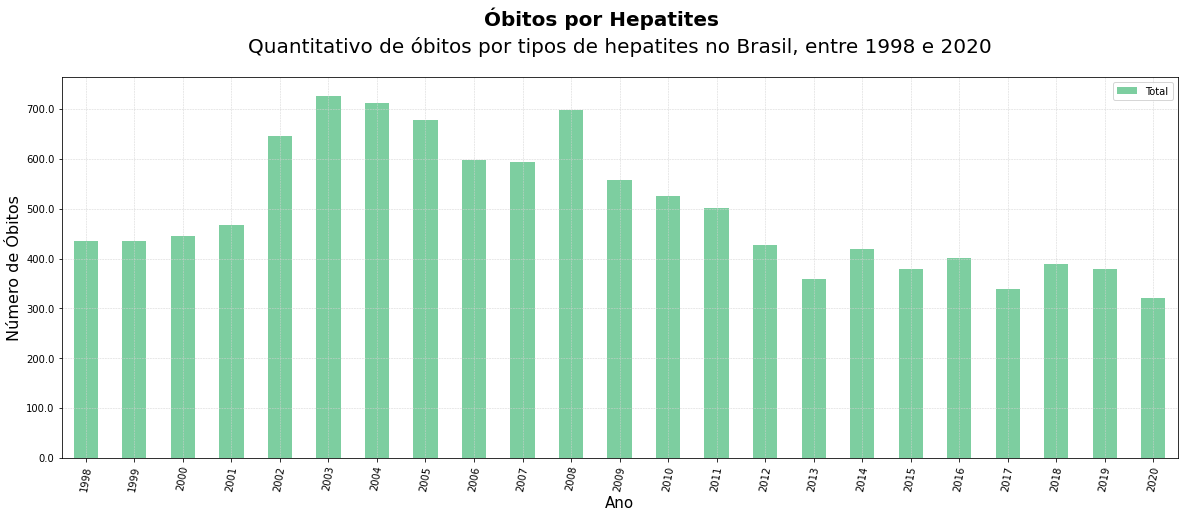

In [320]:
# ax = total_obitos_por_ano.sort_values(by='Total', ascending=False).plot(y='Total', kind='bar',color="#7DCEA0")
ax = total_obitos_por_ano.plot(y='Total', kind='bar',color="#7DCEA0")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Óbitos por Hepatites", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Quantitativo de óbitos por tipos de hepatites no Brasil, entre 1998 e 2020', {'fontsize': 20}).set_position([.5, 1.05])

plt.ylabel("Número de Óbitos", size = 16)
plt.xlabel("Ano", size = 15)
plt.xticks(rotation=80)
plt.grid(color='lightgrey', linestyle='--', linewidth=.5)
plt.show()

## Como visto no gráfico acima, os anos 2003, 2004 e 2008 foram os mais críticos para óbitos relacionados à hepatites. Para uma melhor compreensão desse cenário, vamos analisar as curvas de cadas estado para o ano de 2003 e encontrar algum ponto importante sobre a hepatite afetou o sistema de saúde público

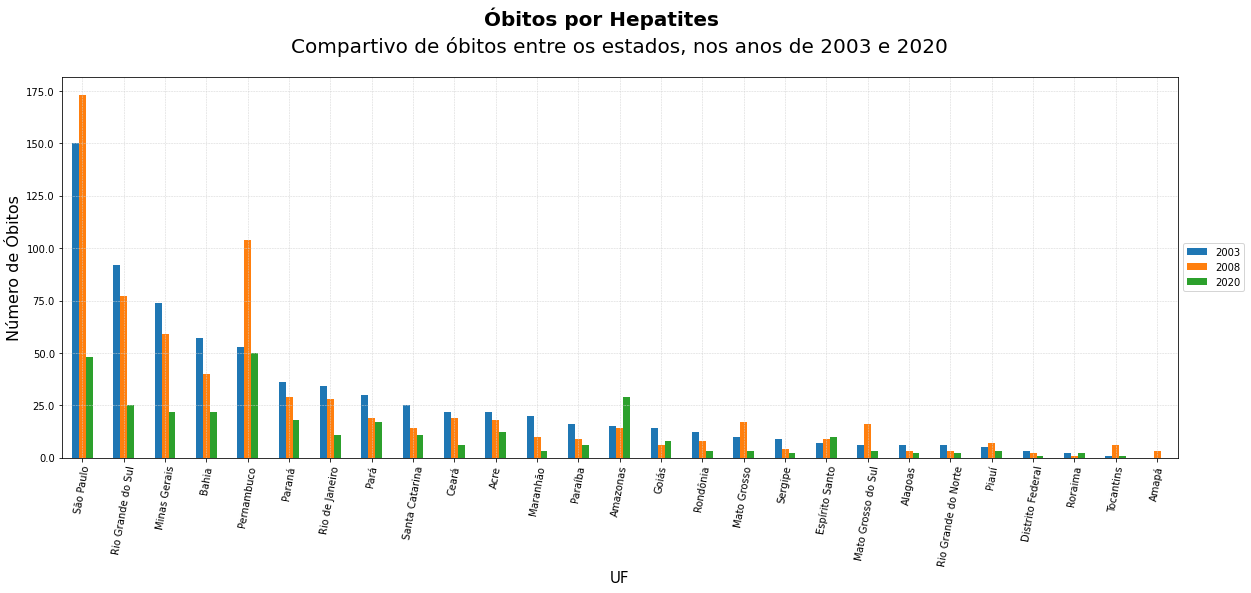

In [340]:
ax = obitos_hepatite[['2003', '2008', '2020']].sort_values(by='2003', ascending=False).plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Óbitos por Hepatites", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Compartivo de óbitos entre os estados, nos anos de 2003 e 2020',{'fontsize': 20}).set_position([.5, 1.05])

plt.ylabel("Número de Óbitos", size = 16)
plt.xlabel("UF", size = 15)
plt.xticks(rotation=80)
plt.grid(color='lightgrey', linestyle='--', linewidth=.5)
plt.show()

## Tendo identificado São Paulo, Rio Grande do Sul, Minas Gerais, Bahia e Pernambuco como os estados mais aflingidos por óbitos relacionadas à hepatite nos anos de 2003, 2004 e 2008, vamos analisar o impacto dessas mortes nos orçamentos dos hospitais pagos pelo SUS entre 1998 e 2008

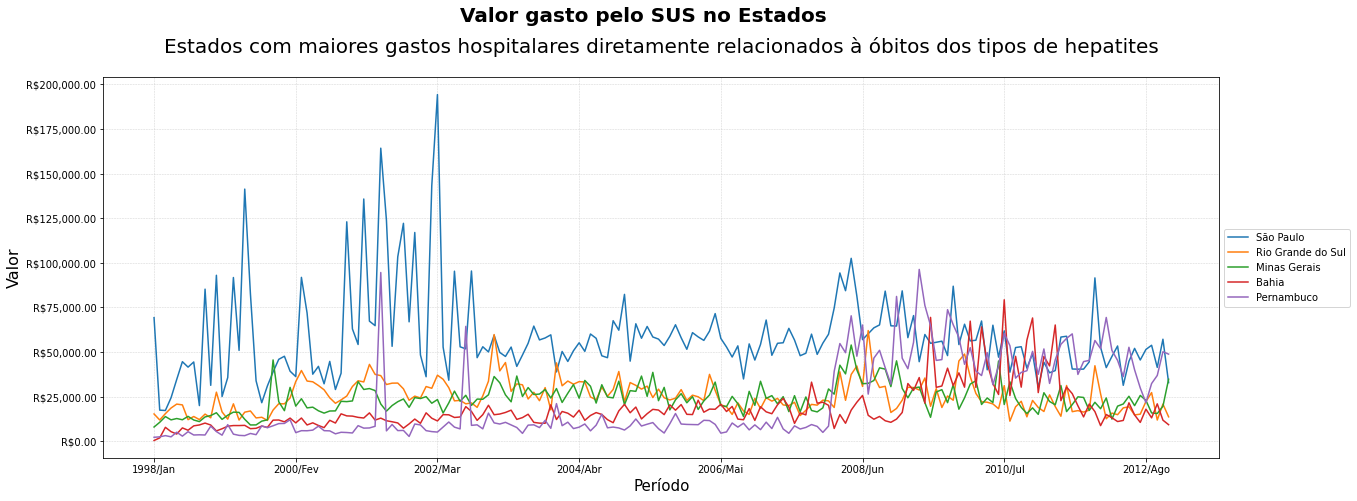

In [329]:
valor_obito_ate_2008 = valor_obitos_hepatite.iloc[:,:180]
valor_obito_ate_2008 = valor_obito_ate_2008.loc[['São Paulo', 'Rio Grande do Sul', 'Minas Gerais', 'Bahia','Pernambuco']]
valor_obito_ate_2008 = valor_obito_ate_2008.astype(float)

ax=valor_obito_ate_2008.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
plt.title('Estados com maiores gastos hospitalares diretamente relacionados à óbitos dos tipos de hepatites',{'fontsize': 20}).set_position([.5, 1.05])
plt.suptitle("Valor gasto pelo SUS no Estados", size=20, weight='bold' ).set_position([.5, 1.02])
plt.ylabel("Valor", size = 16)
plt.xlabel("Período", size = 15)

plt.grid(color='lightgrey', linestyle='--', linewidth=.5)

plt.show()